In [174]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, roc_auc_score, recall_score, precision_score, accuracy_score
from sklearn import ensemble
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
import pickle
import os
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone


data=pd.read_csv('./final_data.csv')

In [131]:
data.head()

,race,gender,age,admission_type_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,...,coverByInsurance,f_diag,s_diag,t_diag,clustering3,clustering4,clustering2,medical_specialty_new,discharge_id,admission_id
0,Caucasian,Male,[50-60),2,10,45,1,23,0,0,...,1,diseases of the circulatory system,neoplasms,neoplasms,0,1,1,Emergency/Trauma,6,7
1,Caucasian,Male,[50-60),1,5,39,4,17,0,0,...,0,diseases of the circulatory system,diseases of the circulatory system,diseases of the respiratory system,2,0,0,InternalMedicine,1,7
2,Caucasian,Female,[60-70),1,3,47,0,13,0,0,...,0,diseases of the digestive system,diseases of the digestive system,"endocrine, nutritional and metabolic diseases,...",2,0,0,InternalMedicine,1,7
3,Caucasian,Female,[70-80),1,5,61,0,14,0,0,...,0,"endocrine, nutritional and metabolic diseases,...","endocrine, nutritional and metabolic diseases,...",diseases of the genitourinary system,2,0,0,InternalMedicine,3,7
4,AfricanAmerican,Male,[30-40),1,10,76,1,23,0,0,...,0,diseases of the circulatory system,diseases of the genitourinary system,"endocrine, nutritional and metabolic diseases,...",0,1,1,No,6,7


In [132]:
data.dtypes
data.miglitol.value_counts()

No        84401
Steady       25
Down          4
Up            2
Name: miglitol, dtype: int64

In [133]:
X = data.copy()
X['admission_type_id'] = X['admission_type_id'].astype(str)

In [134]:
num_lst = list(X.select_dtypes(include = int).columns)

In [135]:
num_lst = num_lst[:8]

In [136]:
num_lst

['time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses']

In [137]:
X = pd.get_dummies(X, drop_first = True)


In [98]:
X.to_csv('data_dummified.csv', index = False)

In [138]:
## creating target variable and dropping from data set

Y = X['target']
X = X.drop('target', axis = 1)

In [139]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, shuffle = True, stratify = Y, random_state = 0)

In [140]:
scaler = StandardScaler()

In [141]:
scaler.fit(X_train[num_lst])

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [142]:
scalerfile = 'scaler.sav'
pickle.dump(scaler, open(scalerfile, 'wb'))


In [143]:
X_train[num_lst] = scaler.transform(X_train[num_lst])
X_test[num_lst] = scaler.transform(X_test[num_lst])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/anaconda3/lib/python3.7/site-packages/ip

In [144]:
X_train.head()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,self_pay,medicaid/medicare,...,discharge_id_5,discharge_id_6,discharge_id_Other,admission_id_17,admission_id_2,admission_id_4,admission_id_5,admission_id_6,admission_id_7,admission_id_Other
35539,-0.465830,0.005031,-0.782940,-0.488897,-0.290279,-0.219506,-0.503423,-0.209445,0,1,...,0,0,0,0,0,0,0,0,1,0
31201,-1.140316,-0.759545,-0.782940,-0.611818,-0.290279,-0.219506,0.301656,0.821978,0,1,...,0,0,0,0,0,0,0,0,1,0
34874,-0.465830,-0.249828,0.391897,-0.120132,-0.290279,-0.219506,-0.503423,0.821978,0,0,...,0,0,0,0,0,0,0,0,0,0
50237,0.883141,1.024465,2.154152,2.952903,-0.290279,-0.219506,-0.503423,-0.725157,0,0,...,0,0,0,0,0,0,0,0,1,0
67165,2.569356,0.005031,0.979315,1.232003,1.284539,-0.219506,1.911813,0.821978,0,0,...,0,0,0,0,0,0,0,0,0,0


In [145]:
X_train.dtypes

time_in_hospital                                      float64
num_lab_procedures                                    float64
num_procedures                                        float64
num_medications                                       float64
number_outpatient                                     float64
number_emergency                                      float64
number_inpatient                                      float64
number_diagnoses                                      float64
self_pay                                                int64
medicaid/medicare                                       int64
coverByInsurance                                        int64
clustering3                                             int64
clustering4                                             int64
clustering2                                             int64
race_Asian                                              uint8
race_Caucasian                                          uint8
race_His

In [146]:
print(X_train.shape)
print(X_test.shape)

(59102, 156)
(25330, 156)


In [123]:
X_train.shape

(59102, 156)

In [147]:
rf=ensemble.RandomForestClassifier()
rf.set_params(oob_score = True, random_state=0, class_weight = 'balanced', n_jobs = -1)
rf.fit(X_train, Y_train) 

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=-1, oob_score=True, random_state=0,
            verbose=0, warm_start=False)

In [148]:
print(roc_auc_score(Y_train, rf.predict(X_train)))
print(roc_auc_score(Y_test, rf.predict(X_test)))

0.9101687590058954
0.5054844250513387


In [169]:
n_trees_range = range(50, 400, 50)  # OOB score will warning if too few trees
train_auc = []
test_auc = []
oob_error = []

for n_trees  in n_trees_range:
        rf.set_params(oob_score = True, random_state=0, class_weight = 'balanced', n_estimators=n_trees, n_jobs= -1)
        rf.fit(X_train, Y_train)
        train_auc.append(roc_auc_score(Y_train, rf.predict_proba(X_train)[:,1]))
        test_auc.append(roc_auc_score(Y_test, rf.predict_proba(X_test)[:,1]))
        oob_error.append(rf.oob_score_)

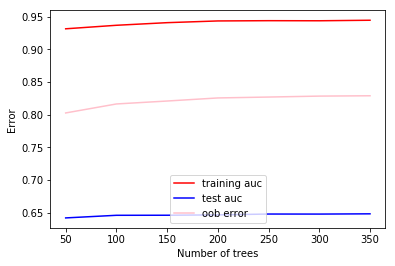

In [170]:
import matplotlib.pyplot as plt
plt.plot(n_trees_range, train_auc, c='red', label='training auc')
plt.plot(n_trees_range, test_auc, c='blue', label='test auc')
plt.plot(n_trees_range, oob_error, c='pink', label='oob error')
plt.ylabel('Error')
plt.xlabel('Number of trees')
plt.legend()
plt.show()

In [165]:
max_depth_range = range(6,17,2)
train_auc = []
test_auc = []
oob_error = []

for max_depth in max_depth_range:
    rf.set_params(oob_score = True, random_state=0, class_weight = 'balanced', n_estimators=100, max_depth = max_depth)
    rf.fit(X_train, Y_train)
    train_auc.append(roc_auc_score(Y_train, rf.predict_proba(X_train)[:,1]))
    test_auc.append(roc_auc_score(Y_test, rf.predict_proba(X_test)[:,1]))
    oob_error.append(rf.oob_score_)

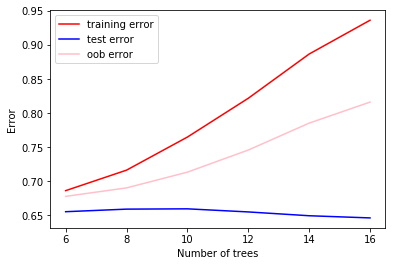

In [166]:
import matplotlib.pyplot as plt
plt.plot(max_depth_range, train_auc, c='red', label='training auc')
plt.plot(max_depth_range, test_auc, c='blue', label='test auc')
plt.plot(max_depth_range, oob_error, c='pink', label='oob error')
plt.ylabel('AUC')
plt.xlabel('Max Depth')
plt.legend()
plt.show()

In [175]:
print("auc train score: ", roc_auc_score(Y_train, rf.predict_proba(X_train)[:,1]))
print("auc test score: ",roc_auc_score(Y_test, rf.predict_proba(X_test)[:,1]))
print("recall train score: ",recall_score(Y_train, rf.predict(X_train)))
print("recall test score: ",recall_score(Y_test, rf.predict(X_test)))
print("precision train score: ", precision_score(Y_train, rf.predict(X_train)))
print("precision test score: ",precision_score(Y_test, rf.predict(X_test)))
print("accuracy train score: ",accuracy_score(Y_train, rf.predict(X_train)))
print("accuracy test score: ",accuracy_score(Y_test, rf.predict(X_test)))
print(confusion_matrix(Y_test, rf.predict(X_test)))

auc train score:  0.9443154549083032
auc test score:  0.6483942840442244
recall train score:  0.736404160475483
recall test score:  0.22010398613518198
precision train score:  0.6126838917047843
precision test score:  0.23605947955390336
accuracy train score:  0.916974044871578
accuracy test score:  0.8300434267666799
[[20390  2055]
 [ 2250   635]]


In [176]:

##predict test data
#randomForest.predict(test)
model=ensemble.RandomForestClassifier(oob_score = True, random_state=0, class_weight = 'balanced', n_jobs= -1)

###Grid Search
cv = StratifiedKFold(n_splits=5, shuffle = True, random_state = 0)
n_estimators = list(range(50, 400, 50))
max_features = ['auto', 'sqrt']
max_depth = list(range(1, 8))
min_samples_split = [2,4,6,8,10]
min_samples_leaf = [2,4, 6,8,10]
bootstrap = [True]
grid_para = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

grid_search_forest = GridSearchCV(model, grid_para, cv=5,scoring = "recall", n_jobs = -1)
grid_search_forest.fit(X_train, Y_train)




KeyboardInterrupt: 